In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings('ignore')

In [8]:
from sklearn.linear_model import Ridge

data = pd.read_csv('drop_outlier_scaled.csv')
X = data.drop(['quality'], axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

ridge = Ridge(alpha=0.1)

ridge.fit(X_train, y_train)

pre = ridge.predict(X_test) 
print(f'테스트 세트의 정확도 : {ridge.score(X_test, y_test):.4f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test.values[:10]}')

테스트 세트의 정확도 : 0.3636
pre :
[5.7531278  5.71230526 5.11020115 5.13866842 6.38729569 5.4422123
 5.41275402 5.22601172 5.64215536 5.73879546]
y   :
[6 6 5 5 6 6 6 5 5 6]


In [3]:
wine = pd.read_csv('winequalityN.csv')
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine['type'] = wine['type'].replace(['white', 'red'], [0, 1])

In [7]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [15]:
wine = wine.dropna()

In [16]:
X = wine.drop(['quality'], axis=1)
y = wine['quality']

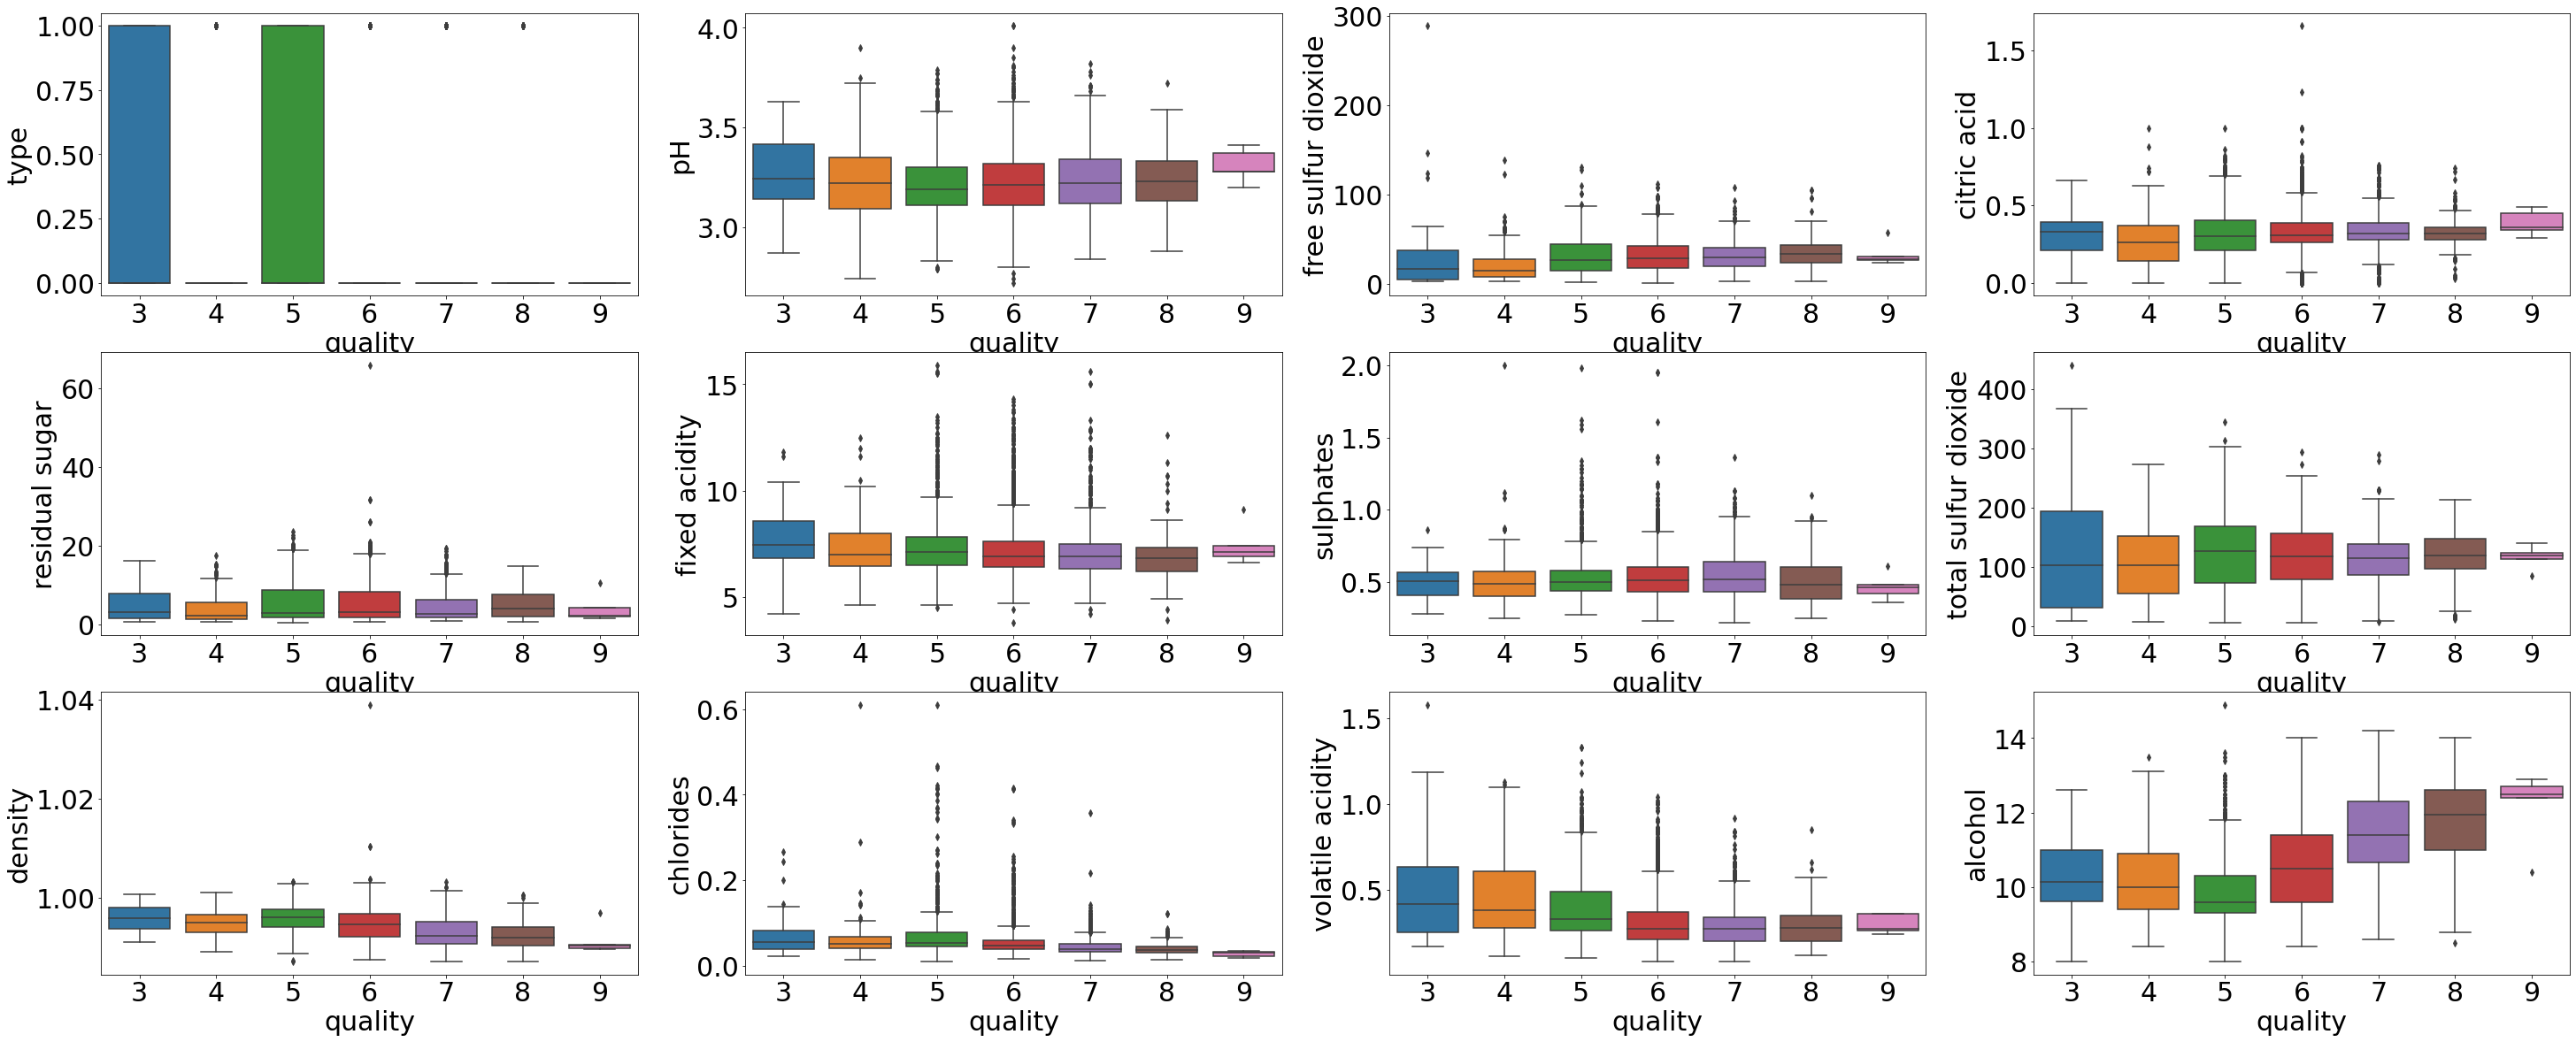

In [17]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (50, 20)
plt.rcParams["font.size"] = 30

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=4, nrows=3)
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 3
    ax_y = idx % 4
    sns.boxplot(x='quality', y=col, data=wine, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

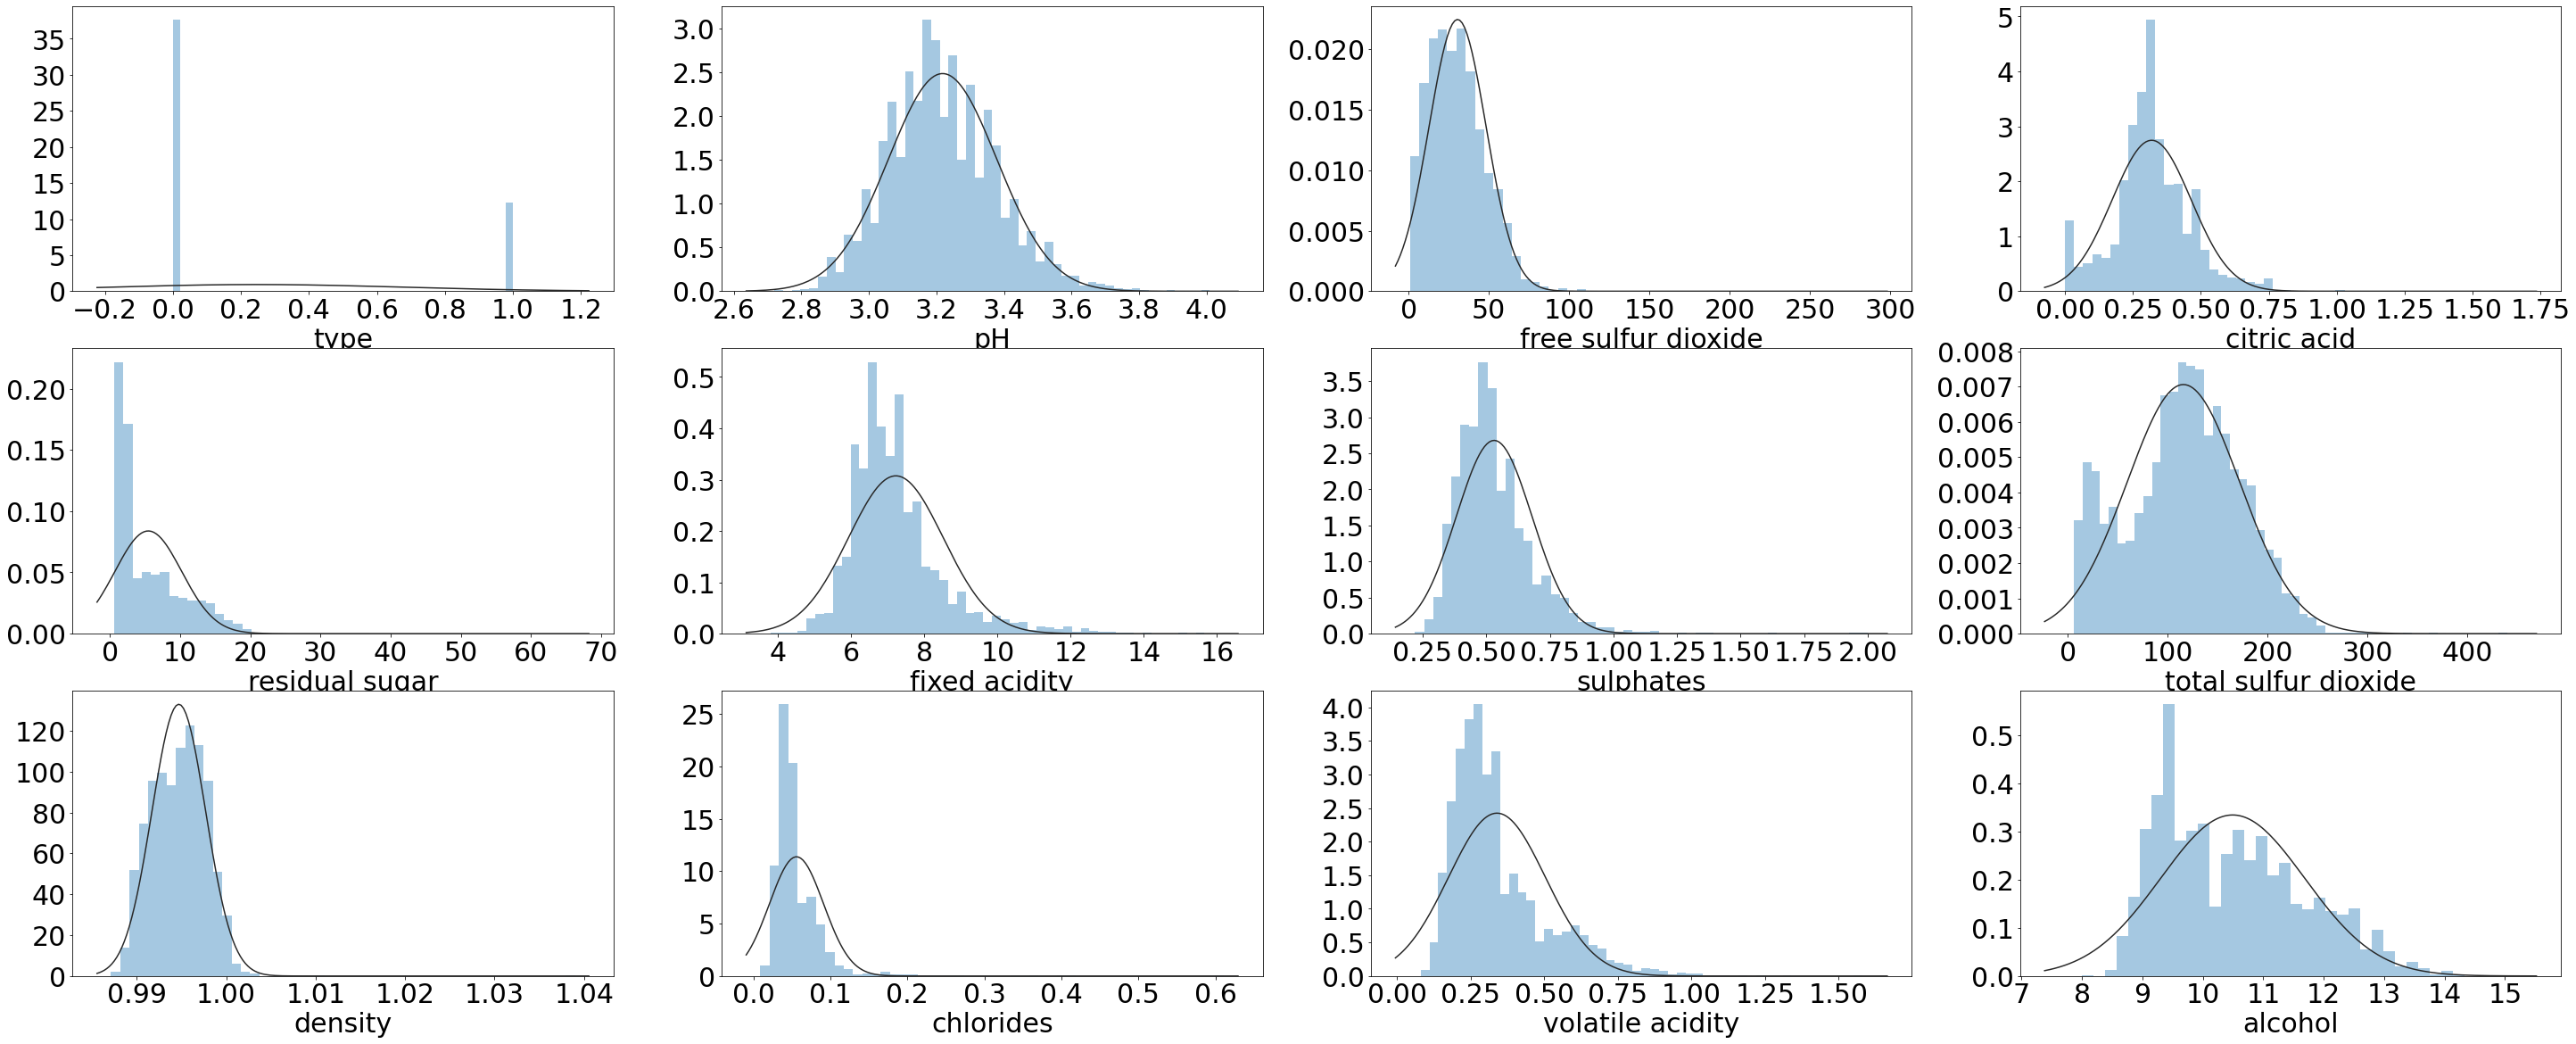

In [18]:
import scipy as sp

plt.rcParams["figure.figsize"] = (50, 20)
plt.rcParams["font.size"] = 30

length=len(X.columns.to_list())
fig, ax = plt.subplots(ncols=4, nrows=3)
plt.rcParams["font.size"] = 3
for idx, col in enumerate(X.columns.to_list()):
    ax_x = idx % 3
    ax_y = idx % 4
    data = wine[col].values
    sns.distplot(data, kde=False, rug=False, fit=sp.stats.norm, ax=ax[ax_x][ax_y], axlabel=col)
    ax_x += 1

plt.show()

In [37]:
def get_outlier(df=None, column=None, weight=1.5):

    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
tmp = wine.copy()
cols = X.drop(['type'], axis=1).columns.to_list()
    
for col in cols:
    outlier_idx = get_outlier(df=tmp, column=col, weight=1.5)
    tmp = tmp.drop(outlier_idx, axis=0)
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4573 entries, 1 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4573 non-null   int64  
 1   fixed acidity         4573 non-null   float64
 2   volatile acidity      4573 non-null   float64
 3   citric acid           4573 non-null   float64
 4   residual sugar        4573 non-null   float64
 5   chlorides             4573 non-null   float64
 6   free sulfur dioxide   4573 non-null   float64
 7   total sulfur dioxide  4573 non-null   float64
 8   density               4573 non-null   float64
 9   pH                    4573 non-null   float64
 10  sulphates             4573 non-null   float64
 11  alcohol               4573 non-null   float64
 12  quality               4573 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 629.2 KB


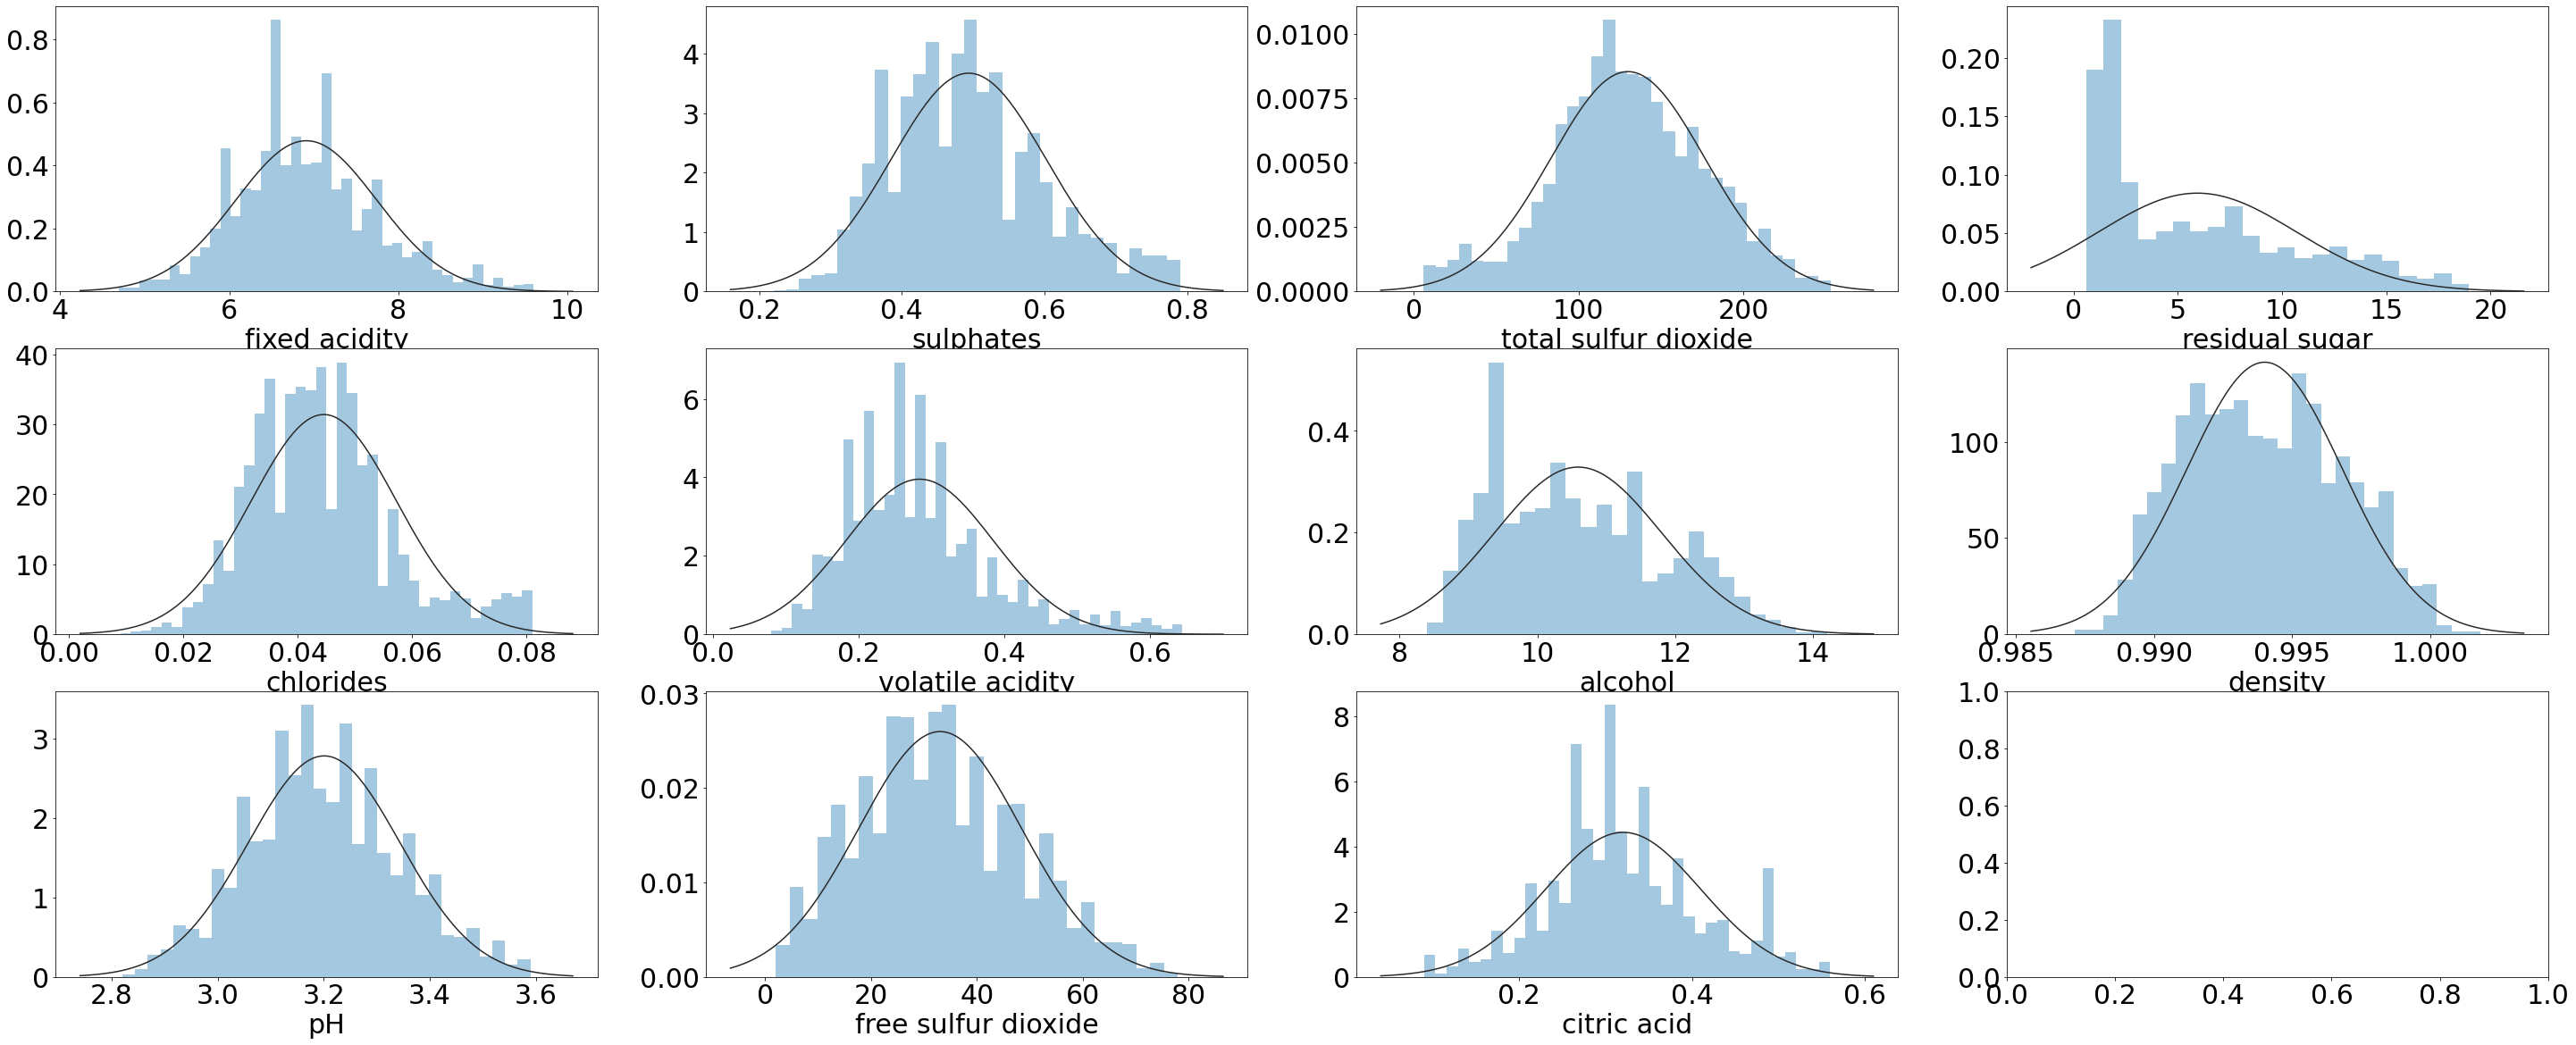

In [38]:
plt.rcParams["figure.figsize"] = (50, 20)
plt.rcParams["font.size"] = 30

fig, ax = plt.subplots(ncols=4, nrows=3)
for idx, col in enumerate(cols):
    ax_x = idx % 3
    ax_y = idx % 4
    data = tmp[col].values
    sns.distplot(data, kde=False, rug=False, fit=sp.stats.norm, ax=ax[ax_x][ax_y], axlabel=col)
    ax_x += 1

plt.show()

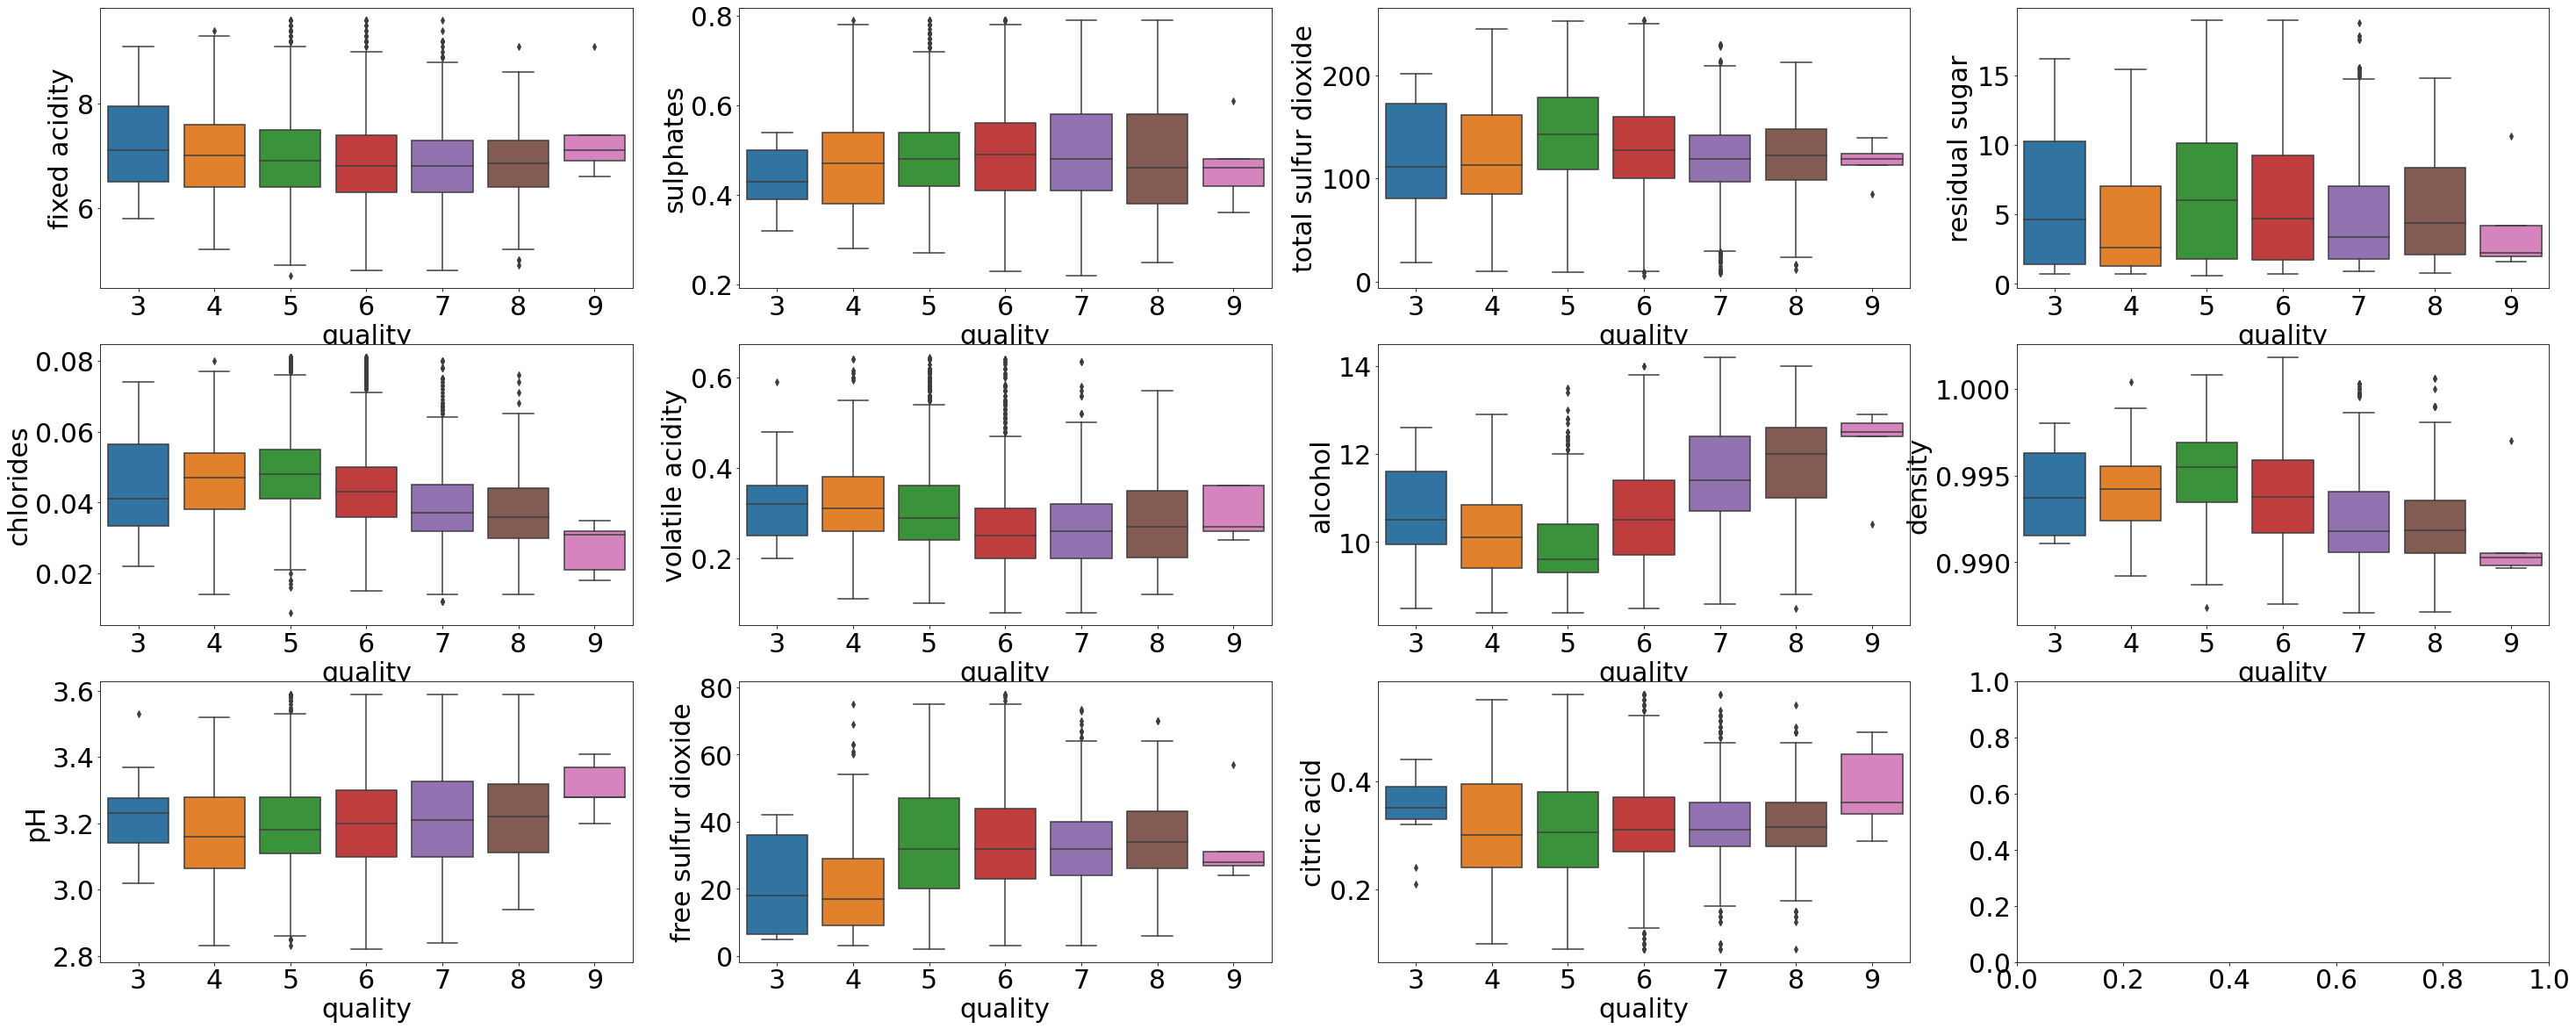

In [40]:
plt.rcParams["figure.figsize"] = (50, 20)
plt.rcParams["font.size"] = 30

fig, ax = plt.subplots(ncols=4, nrows=3)
for idx, col in enumerate(cols):
    ax_x = idx % 3
    ax_y = idx % 4
    sns.boxplot(x='quality', y=col, data=tmp, ax=ax[ax_x][ax_y])
    ax_x += 1
    

plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
X = tmp.drop(['type','quality'], axis=1)
ty = tmp['type']
y = tmp['quality']

scaler = StandardScaler().fit(X)
Xscaled = scaler.transform(X)

df_scaled = pd.DataFrame(data=Xscaled, columns=X.columns.to_list())
df_scaled[ty.name] = ty.values
df_scaled[y.name] = y.values
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,-0.734082,0.159153,0.217637,-0.915600,0.350900,-1.242012,0.042994,-0.000730,0.693511,-0.033218,-0.897231,0,6
1,1.425698,-0.039038,0.885817,0.202677,0.429606,-0.200477,-0.706289,0.389072,0.414324,-0.493819,-0.402680,0,6
2,0.345808,-0.534515,-0.005090,0.540270,1.059257,0.906155,1.199031,0.566255,-0.074254,-0.862299,-0.567531,0,6
3,0.345808,-0.534515,-0.005090,0.540270,1.059257,0.906155,1.199031,0.566255,-0.074254,-0.862299,-0.567531,0,6
4,1.425698,-0.039038,0.885817,0.202677,0.429606,-0.200477,-0.706289,0.389072,0.414324,-0.493819,-0.402680,0,6


In [46]:
def fc(data):
    if data > 5:
        # 좋은거
        return 1
    # 나쁜거
    return 0
binary = df_scaled.copy()
binary['quality'] = binary['quality'].apply(fc)
binary.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,-0.734082,0.159153,0.217637,-0.915600,0.350900,-1.242012,0.042994,-0.000730,0.693511,-0.033218,-0.897231,0,1
1,1.425698,-0.039038,0.885817,0.202677,0.429606,-0.200477,-0.706289,0.389072,0.414324,-0.493819,-0.402680,0,1
2,0.345808,-0.534515,-0.005090,0.540270,1.059257,0.906155,1.199031,0.566255,-0.074254,-0.862299,-0.567531,0,1
3,0.345808,-0.534515,-0.005090,0.540270,1.059257,0.906155,1.199031,0.566255,-0.074254,-0.862299,-0.567531,0,1
4,1.425698,-0.039038,0.885817,0.202677,0.429606,-0.200477,-0.706289,0.389072,0.414324,-0.493819,-0.402680,0,1


In [47]:
binary.to_csv('data/out_binary_class_type.csv', index=False)